## Problem definition

### Using the California Housing price dataset we are going to predict the house values based on multiple parameters

In [170]:
# Libraries 
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics.pairwise import rbf_kernel
from pandas.plotting import scatter_matrix
from math import sqrt

In [171]:
# Select the performance measure. 
#1. RMSE - Root mean square error
#2. MAE - Mean Absolute Error

## RMSE 

In [172]:
# Root mean square error tell us how much far apart are out predicted values 
# are form the observed values.

#Formula - n is sample size. 

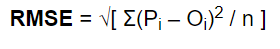

In [173]:
# example 
actual= [34, 37, 44, 47, 48, 48, 46, 43, 32, 27, 26, 24]
pred = [37, 40, 46, 44, 46, 50, 45, 44, 34, 30, 22, 23]

In [174]:
RMSE = sqrt(mean_squared_error(actual, pred))
RMSE

2.4324199198877374

In [175]:
# Interpretate 
# Larger the value means larger difference and worse the model fits the data.

In [176]:
# custom function for root mean squared error

def custom_rmse(actual_values, pred_values):
    a, p = np.array(actual_values), np.array(pred_values)
    return sqrt(np.sum(np.square(p-a))/len(actual_values))

In [177]:
custom_rmse(actual, pred)

2.4324199198877374

# MSE

In [178]:
# Measn Square Error - absolute difference between the actual and predicted value. 

# formaula 

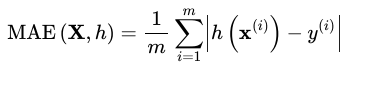

In [179]:
true = [1,2,3,4,5,6]
predicted = [1,3,4,4,5,9]

In [180]:
mean_absolute_error(true, predicted)

0.8333333333333334

In [181]:
# Interpretation
# If MAE is 10 mean on avergae MSE is 10 unit away from the actual value
# Close the MSE value to 0 is better. 

In [182]:
# Custom function for MAE

def custom_mae(true_values, predicted_values):
    x, y = np.array(true_values), np.array(predicted_values)
    return np.mean(np.abs(x-y))
    
    

In [183]:
custom_mae(true, predicted)

0.8333333333333334

In [184]:
# Load the data
housing_data = pd.read_csv("data/housing.csv")

In [185]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [186]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [187]:
housing_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [188]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


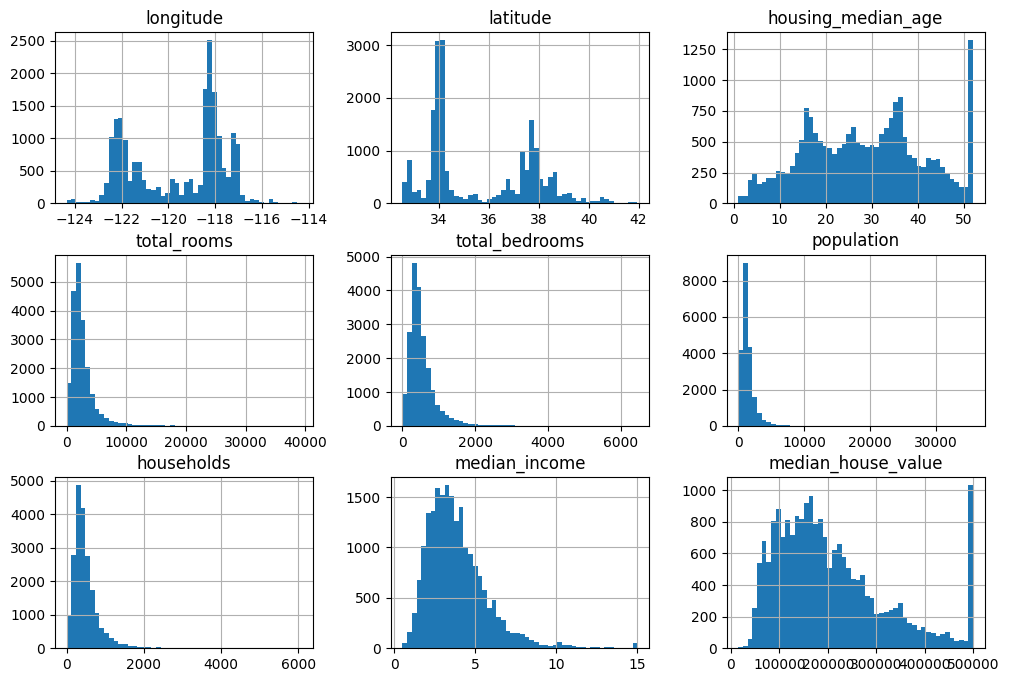

In [189]:
# Visualize the data 

housing_data.hist(bins=50, figsize=(12,8));

### Create a test set

In [190]:
def shuffle_and_split(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [191]:
train_set, test_set = shuffle_and_split(housing_data, 0.2)

In [192]:
len(train_set)

16512

In [193]:
len(test_set)

4128

In [194]:
#using scikit learn
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [195]:
len(train_set)

16512

In [196]:
len(test_set)

4128

In [197]:
housing_data['median_income'] # this we can convert to bins

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [198]:
housing_data['income_cat'] = pd.cut(housing_data['median_income'], 
      bins=[0.,1.5, 3.0, 4.5,6., np.inf], 
      labels=[1,2,3,4,5])

In [199]:
housing_data['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

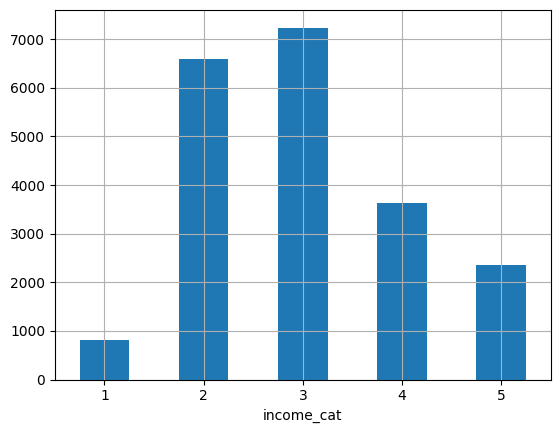

In [200]:
housing_data['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True);

In [201]:
# stratified sampling - 
# Involves the division of a dataset into smaller groupd known as strata. 

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing_data, housing_data['income_cat']):
    strat_train_set_n = housing_data.iloc[train_index]
    strat_test_set_n = housing_data.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [202]:
strat_train_set_n, strat_test_set_n = strat_splits[0]

In [203]:
strat_train_set_n

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [204]:
# train_test_split()

strat_train_set, strat_test_set = train_test_split(housing_data, test_size=0.2, random_state=42, 
                 stratify=housing_data['income_cat'])

In [205]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [206]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [207]:
# drop income_cat column

for _ in (strat_train_set, strat_test_set):
    _.drop('income_cat', axis=1, inplace=True)

## Visualization

<Axes: xlabel='longitude', ylabel='latitude'>

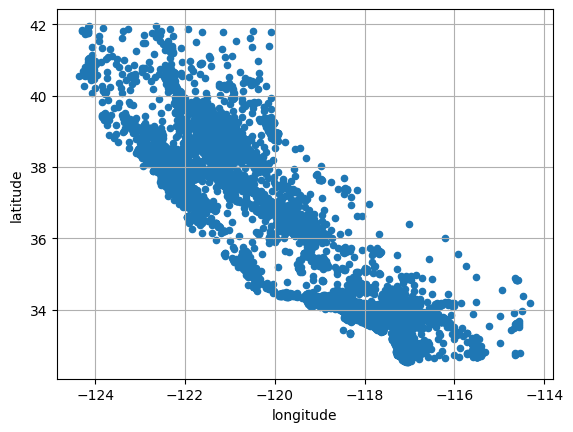

In [208]:
housing_data.plot(kind='scatter', 
                 x = "longitude", 
                 y = "latitude", 
                 grid=True)


<Axes: xlabel='longitude', ylabel='latitude'>

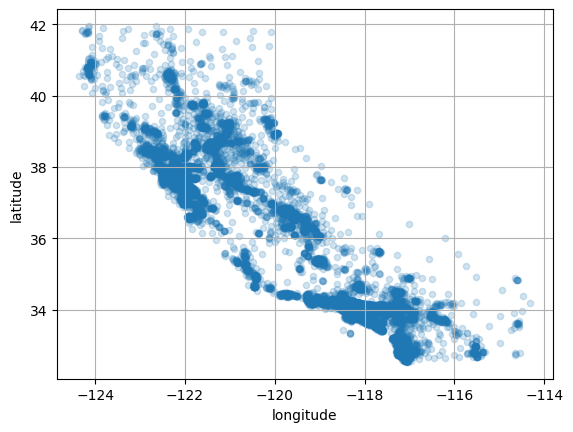

In [209]:
housing_data.plot(kind='scatter', 
                 x = "longitude", 
                 y = "latitude", 
                 grid=True, 
                 alpha = .2)
# to show density

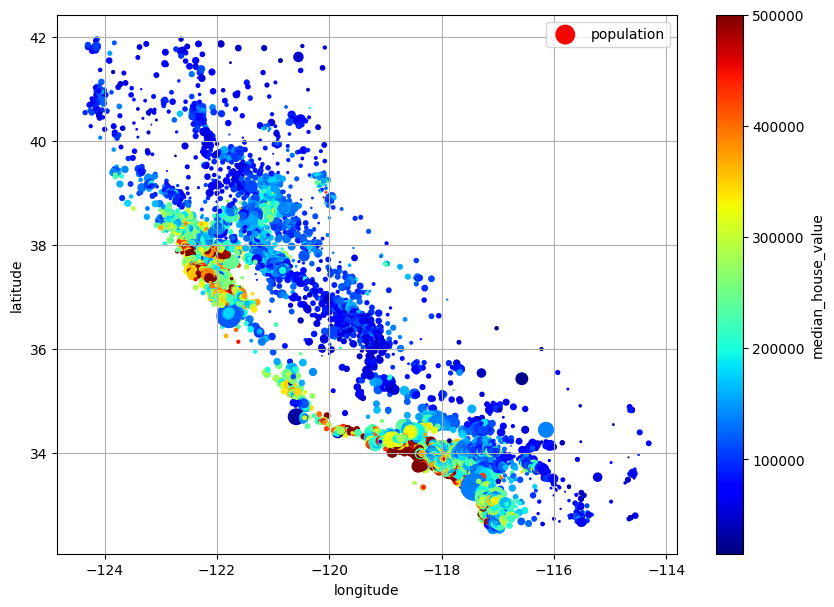

In [210]:
housing_data.plot(kind='scatter', 
                 x = "longitude", 
                 y = "latitude", 
                 grid=True, 
                 s = housing_data['population']/100, 
                  label='population', 
                 c = "median_house_value", cmap = "jet", colorbar = True, 
                 legend = True, 
                 sharex = False, 
                 figsize = (10,7));

## Check Correlation

In [211]:
corr_matrix = housing_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'income_cat']].corr()

In [212]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

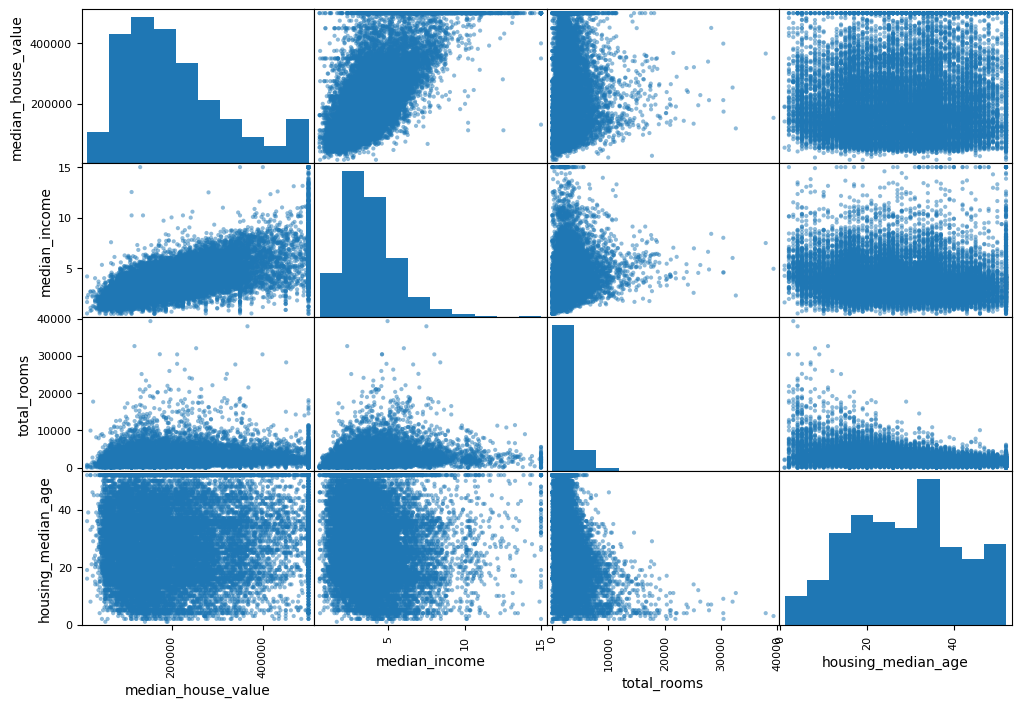

In [213]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing_data[attributes], figsize=(12,8));

<Axes: xlabel='median_income', ylabel='median_house_value'>

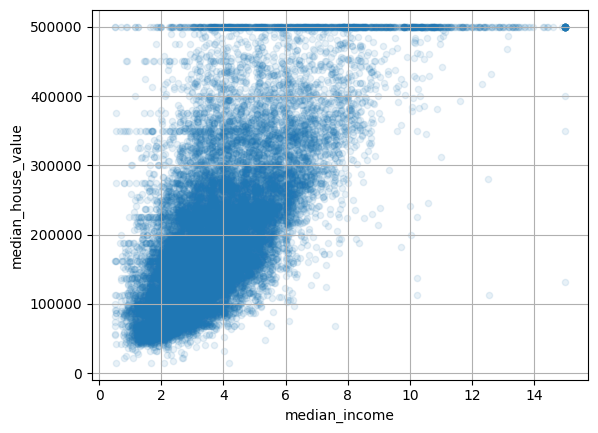

In [214]:
#Median Income
housing_data.plot(kind = "scatter", x = "median_income", 
                  y = "median_house_value", grid = True, 
                 alpha = 0.1)


### Create new attributes

In [215]:
housing_data['room_per_house'] = housing_data['total_rooms']/housing_data['households']
housing_data['bedrooms_ratio'] = housing_data['total_bedrooms']/housing_data['total_rooms']
housing_data['people_per_house'] = housing_data['population']/housing_data['households']

In [216]:
corr_matrix = housing_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'income_cat']].corr()

In [217]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [218]:
housing_data = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## cleaning up data 

In [219]:
# total_bedroom has missing value.
# filling missing values with median

median = housing_data['total_bedrooms'].median()

housing_data['total_bedrooms'].fillna(median, inplace=True)

In [220]:
# We can also use Scikit-Learn class SimpleImputer

from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')

In [221]:
# to seprate the numerical columns
housing_num = housing_data.select_dtypes(include = [np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [222]:
impute.fit(housing_num) # training

SimpleImputer(strategy='median')

In [223]:
impute.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [224]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [225]:
X = impute.transform(housing_num)

In [226]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [227]:
hoursing_tr = pd.DataFrame(X, columns=housing_num.columns, 
                          index = housing_num.index)

In [228]:
hoursing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [229]:
hoursing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Handling Text and Categorical Data

In [230]:
housing_data['ocean_proximity'].head(7)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
Name: ocean_proximity, dtype: object

In [231]:
housing_cat = housing_data[['ocean_proximity']]
housing_cat.tail(8)

,ocean_proximity
2271,INLAND
6980,<1H OCEAN
5206,<1H OCEAN
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN
19773,INLAND


In [232]:
# convert categorical text to number
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [233]:
housing_cat_encoded[:9]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.]])

In [234]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Probelm with oridinal_encoder it will assume two nearby values are same

In [235]:
# Using OneHotncoder is better approach

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [236]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [237]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [238]:
## Pandas has function which convert categories to number.  

In [239]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [240]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature Scaling and Transformations

### ML does not perform well if feature are of different scale. 
### Two ways to get all attributes on same scale. 
### 1. min-max scaling - Normalization
### 2. Standardization

In [241]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [242]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaler = std_scaler.fit_transform(housing_num)

### What to do if feature is heavy-tailed. 

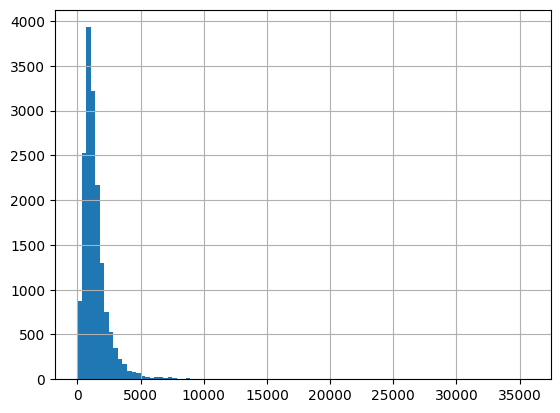

In [243]:
housing_data['population'].hist(bins=100);

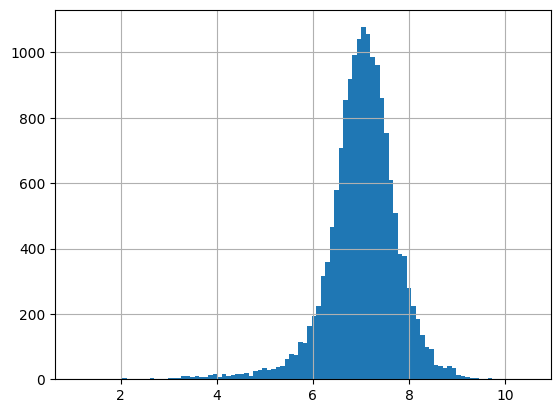

In [244]:
np.log(housing_data['population']).hist(bins=100);

### Custom Transformers

In [245]:
# log custom transformer apply to popluation feature

from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing_data[['population']])

array([[<Axes: title={'center': 'population'}>]], dtype=object)

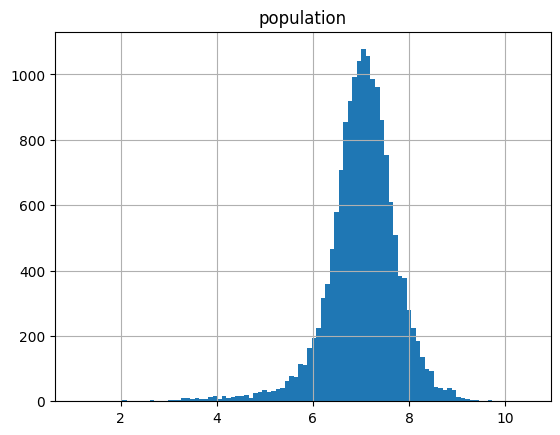

In [246]:
log_pop.hist(bins=100)

In [247]:
# Custom transformer that similar to StandardScaler

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

In [248]:
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean = True): # no args, or **kwargs
        self.with_mean = with_mean
        
    def fit(seld, X, y=None): 
        X = check_array(X) # check that X is array with finist float values
        self.mean_ = X.meanan(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1] # every estimator stores this in fit()
        return self # always return self
    
    def transform(self, X):
        check_is_fitted(self) # looked for learned attributes with trailing _
        X = check_array(X)
        assert seld.n_features_in_ == X.shapeape[1]
        if self.with_mean:
            X = X-self.mean_
        return X/self.scale_
        
    

In [249]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # always return self!
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

## Transformation Pipelines

In [250]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")), 
    ("standardize", StandardScaler()),
])

In [251]:
# if you don't want to name pipeline

from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [254]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

In [259]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(), 
            index = housing_num.index)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752
...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261


### To handle both numerical and categorical together

In [260]:
from sklearn.compose import ColumnTransformer
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
"total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), 
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, "num_attribs"),
    ("cat", cat_pipeline, "cat_attribs"),
])


In [261]:
# better approach provided by Scikit-Learn to select feature based n the type

from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeling, make_column_selector(dtype_include=np.number)), 
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [262]:
housing_prepared = preprocessing.fit_transform(housing_data)

In [263]:
housing_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ]])

In [264]:
def column_ratio(X):
    return X[:,[0]]/X[:,[1]]

In [265]:
def ratio_name(function_transformerm, feature_names_in):
    return ["ration"] # feature names out

In [266]:
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
    FunctionTransformer(column_ratio, feature_names_out=ratio_name), 
    StandardScaler())

In [267]:
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma = 1., random_state=42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), SimpleImputer())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]), 
    ("log", log_pipeline, ["total_bedrooms", "total_rooms","population", 
                           "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]), 
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], 
remainder=default_num_pipeline)

In [268]:
housing_prepared = preprocessing.fit_transform(housing_data)

C:\Users\NEXT\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [269]:
housing_prepared.shape

(16512, 24)

In [270]:
preprocessing.get_feature_names_out()

array(['bedrooms__ration', 'rooms_per_house__ration',
       'people_per_house__ration', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Transformation Pipeline

In [ ]:
# better approach provided by Scikit-Learn to select feature based n the type

from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)), 
    (cat_pipeline, make_column_selector(dtype_include=object)),
)